In [1]:
import tensorflow as tf
from pathlib import Path
import pathlib
from tensorflow.keras.callbacks import TensorBoard

In [2]:
data_root = Path('E:/data/tiny-imagenet-200/tiny-imagenet-200')
# data_root = Path('./tiny-imagenet-200/')

In [3]:
train_image_paths = list(data_root.glob('train/*/*/*'))
train_image_paths = [str(path) for path in train_image_paths]
image_count = len(train_image_paths)
print(f"training images: {image_count}")

test_image_paths = list(data_root.glob('test/images/*'))
test_image_paths = [str(path) for path in test_image_paths]
image_count = len(test_image_paths)
print(f"test images: {image_count}")

val_image_paths = list(data_root.glob('val/images/*'))
val_image_paths = [str(path) for path in val_image_paths]
image_count = len(val_image_paths)
print(f"val images: {image_count}")

# print(train_image_paths[:3])
print(val_image_paths[:5])

training images: 100000
test images: 10000
val images: 10000
['E:\\data\\tiny-imagenet-200\\tiny-imagenet-200\\val\\images\\val_0.JPEG', 'E:\\data\\tiny-imagenet-200\\tiny-imagenet-200\\val\\images\\val_1.JPEG', 'E:\\data\\tiny-imagenet-200\\tiny-imagenet-200\\val\\images\\val_10.JPEG', 'E:\\data\\tiny-imagenet-200\\tiny-imagenet-200\\val\\images\\val_100.JPEG', 'E:\\data\\tiny-imagenet-200\\tiny-imagenet-200\\val\\images\\val_1000.JPEG']


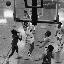

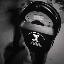

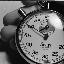

In [4]:
import IPython.display as display
import random
    
for n in range(3):
  image_path = random.choice(val_image_paths)
  display.display(display.Image(image_path))
  print()

In [5]:
label_names = sorted(item.name for item in data_root.glob('train/*/') if item.is_dir())
label_names[0:5]

['n01443537', 'n01629819', 'n01641577', 'n01644900', 'n01698640']

In [6]:
label_to_index = dict((name, index) for index,name in enumerate(label_names))
label_to_index

{'n01443537': 0,
 'n01629819': 1,
 'n01641577': 2,
 'n01644900': 3,
 'n01698640': 4,
 'n01742172': 5,
 'n01768244': 6,
 'n01770393': 7,
 'n01774384': 8,
 'n01774750': 9,
 'n01784675': 10,
 'n01855672': 11,
 'n01882714': 12,
 'n01910747': 13,
 'n01917289': 14,
 'n01944390': 15,
 'n01945685': 16,
 'n01950731': 17,
 'n01983481': 18,
 'n01984695': 19,
 'n02002724': 20,
 'n02056570': 21,
 'n02058221': 22,
 'n02074367': 23,
 'n02085620': 24,
 'n02094433': 25,
 'n02099601': 26,
 'n02099712': 27,
 'n02106662': 28,
 'n02113799': 29,
 'n02123045': 30,
 'n02123394': 31,
 'n02124075': 32,
 'n02125311': 33,
 'n02129165': 34,
 'n02132136': 35,
 'n02165456': 36,
 'n02190166': 37,
 'n02206856': 38,
 'n02226429': 39,
 'n02231487': 40,
 'n02233338': 41,
 'n02236044': 42,
 'n02268443': 43,
 'n02279972': 44,
 'n02281406': 45,
 'n02321529': 46,
 'n02364673': 47,
 'n02395406': 48,
 'n02403003': 49,
 'n02410509': 50,
 'n02415577': 51,
 'n02423022': 52,
 'n02437312': 53,
 'n02480495': 54,
 'n02481823': 55,
 '

In [7]:
train_image_labels = [label_to_index[pathlib.Path(path).parent.parent.name]
                    for path in train_image_paths]
print(train_image_labels[0:10])
print(train_image_labels[1000:1010])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [8]:
# import pandas as pd
# data = pd.read_csv('E:/data/tiny-imagenet-200/tiny-imagenet-200/val/val_annotations.txt', sep="\t", header=None, index_col=None)
# data.head(5)

In [9]:
import csv
import os
with open('E:/data/tiny-imagenet-200/tiny-imagenet-200/val/val_annotations.txt') as csvfile:
    readCSV = csv.reader(csvfile, delimiter='\t')
#     val_image_labels = [label_to_index[row[1]] for row in readCSV]
    val_image_to_label = {} 
    for row in readCSV:
        val_image_to_label[row[0]] = row[1]
#         val_image_labels = [row[1] for row in readCSV]
val_image_labels = []
for p in val_image_paths:
    p = os.path.basename(p)
    val_image_labels.append(label_to_index[val_image_to_label[p]])
val_image_labels

[107,
 139,
 158,
 90,
 138,
 67,
 135,
 198,
 38,
 88,
 63,
 107,
 107,
 11,
 42,
 51,
 23,
 167,
 78,
 195,
 134,
 162,
 27,
 170,
 197,
 38,
 71,
 35,
 69,
 51,
 83,
 104,
 192,
 35,
 97,
 80,
 130,
 116,
 20,
 52,
 135,
 165,
 33,
 68,
 99,
 17,
 166,
 110,
 175,
 175,
 192,
 139,
 101,
 39,
 40,
 93,
 127,
 35,
 36,
 18,
 167,
 11,
 13,
 1,
 159,
 5,
 169,
 104,
 164,
 194,
 134,
 32,
 35,
 190,
 5,
 53,
 104,
 186,
 35,
 46,
 118,
 165,
 153,
 114,
 21,
 132,
 52,
 88,
 123,
 99,
 14,
 32,
 126,
 93,
 196,
 12,
 44,
 48,
 13,
 192,
 6,
 189,
 151,
 72,
 104,
 174,
 196,
 192,
 84,
 183,
 145,
 147,
 102,
 188,
 174,
 56,
 120,
 126,
 46,
 89,
 180,
 196,
 5,
 171,
 53,
 67,
 188,
 75,
 186,
 10,
 52,
 66,
 196,
 76,
 105,
 197,
 109,
 20,
 75,
 190,
 22,
 8,
 93,
 12,
 9,
 160,
 73,
 172,
 59,
 72,
 129,
 174,
 7,
 130,
 129,
 152,
 109,
 68,
 138,
 27,
 5,
 47,
 79,
 2,
 160,
 95,
 18,
 60,
 158,
 53,
 91,
 108,
 161,
 85,
 147,
 134,
 44,
 102,
 53,
 191,
 57,
 114,
 136,
 102,

In [10]:
img_path = train_image_paths[0]
val_img_path = val_image_paths[0]
print(img_path)
print(val_img_path)

E:\data\tiny-imagenet-200\tiny-imagenet-200\train\n01443537\images\n01443537_0.JPEG
E:\data\tiny-imagenet-200\tiny-imagenet-200\val\images\val_0.JPEG


In [11]:
img_raw = tf.read_file(img_path)
val_img_raw = tf.read_file(val_img_path)
print(repr(img_raw)[:100]+"...")
print(repr(val_img_raw)[:100]+"...")

<tf.Tensor 'ReadFile:0' shape=() dtype=string>...
<tf.Tensor 'ReadFile_1:0' shape=() dtype=string>...


In [12]:
img_tensor = tf.image.decode_image(img_raw)
val_img_tensor = tf.image.decode_image(val_img_raw)
print(img_tensor.shape)
print(val_img_tensor.shape)

Instructions for updating:
Colocations handled automatically by placer.
<unknown>
<unknown>


In [13]:
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize_images(image, [64, 64])
    image = tf.cast(image,tf.float32)
    image /= 255.0   # normalize to [0,1] range
    return image

In [14]:
def load_and_preprocess_image(path):
    image = tf.read_file(path)
    return preprocess_image(image)

In [15]:
import matplotlib.pyplot as plt

image_path = train_image_paths[0]
val_image_path = val_image_paths[0]

label = train_image_labels[0]
val_label = val_image_labels[0]

# plt.imshow(load_and_preprocess_image(val_img_path))
# plt.grid(False)
# plt.title(val_label)
# print()

In [16]:
train_path_ds = tf.data.Dataset.from_tensor_slices(train_image_paths)
val_path_ds = tf.data.Dataset.from_tensor_slices(val_image_paths)

In [17]:
print('shape: ', repr(val_path_ds.output_shapes))
print('type: ', val_path_ds.output_types)
print()
print(val_path_ds)

shape:  TensorShape([])
type:  <dtype: 'string'>

<DatasetV1Adapter shapes: (), types: tf.string>


In [18]:
train_image_ds = train_path_ds.map(load_and_preprocess_image, num_parallel_calls=6)
val_image_ds = val_path_ds.map(load_and_preprocess_image, num_parallel_calls=6)
print(train_image_ds)
print(val_image_ds)

<DatasetV1Adapter shapes: (64, 64, 3), types: tf.float32>
<DatasetV1Adapter shapes: (64, 64, 3), types: tf.float32>


In [19]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(8,8))
# for n,image in enumerate(val_image_ds.take(4)):
#   plt.subplot(2,2,n+1)
#   plt.imshow(image)
#   plt.grid(False)
#   plt.xticks([])
#   plt.yticks([])

In [20]:
train_label_ds = tf.data.Dataset.from_tensor_slices(tf.one_hot(tf.cast(train_image_labels, tf.int64), 200))
val_label_ds = tf.data.Dataset.from_tensor_slices(tf.one_hot(tf.cast(val_image_labels, tf.uint8), 200))

In [21]:
print(tf.cast(train_image_labels[0],5))

Tensor("Cast_2:0", shape=(), dtype=int16)


In [22]:
train_image_label_ds = tf.data.Dataset.zip((train_image_ds, train_label_ds))
val_image_label_ds = tf.data.Dataset.zip((val_image_ds, val_label_ds))

In [23]:
print('image shape: ', val_image_label_ds.output_shapes[0])
print('label shape: ', val_image_label_ds.output_shapes[1])
print('types: ', val_image_label_ds.output_types)
print()
print(val_image_label_ds)

image shape:  (64, 64, 3)
label shape:  (200,)
types:  (tf.float32, tf.float32)

<DatasetV1Adapter shapes: ((64, 64, 3), (200,)), types: (tf.float32, tf.float32)>


In [39]:
EPOCHS = 120
NUM_CLASSES = 200
BATCH_SIZE = 128
NUM_CORES = 6
LR = 0.1
IMAGE_SHAPE = (64, 64, 3)
TRANSFORMED_IMAGE_SHAPE = (64, 64, 3)

In [40]:
train_ds = train_image_label_ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=10000))
val_ds = val_image_label_ds.repeat()
train_ds = train_ds.batch(BATCH_SIZE)
val_ds = val_ds.batch(BATCH_SIZE)
train_ds = train_ds.prefetch(tf.data.experimental.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.experimental.AUTOTUNE)

In [41]:
from resnet34 import resnet34
from lenet5_keras import net

In [42]:
def visualize_training(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.plot(history.history['loss'])
    plt.title('Training Visualization')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [43]:
model = resnet34(input_shape=TRANSFORMED_IMAGE_SHAPE, initial_downsample=False,
                 num_classes=NUM_CLASSES)
# model = net()
optimizer = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['acc'])

In [44]:
len(val_image_paths)

10000

Epoch 1/120
781/781 [==============================] - 213s 272ms/step - loss: 4.5489 - acc: 0.0683 - val_loss: 7.0433 - val_acc: 0.0084
Epoch 2/120
781/781 [==============================] - 193s 247ms/step - loss: 3.9909 - acc: 0.1022 - val_loss: 5.6864 - val_acc: 0.0157
Epoch 3/120
781/781 [==============================] - 193s 247ms/step - loss: 3.7468 - acc: 0.1332 - val_loss: 5.4058 - val_acc: 0.0489
Epoch 4/120
781/781 [==============================] - 193s 248ms/step - loss: 3.5617 - acc: 0.1652 - val_loss: 5.6912 - val_acc: 0.0244
Epoch 5/120
781/781 [==============================] - 194s 249ms/step - loss: 3.5369 - acc: 0.1743 - val_loss: 5.7061 - val_acc: 0.0383
Epoch 6/120
781/781 [==============================] - 194s 248ms/step - loss: 3.4155 - acc: 0.2009 - val_loss: 5.6253 - val_acc: 0.0518
Epoch 7/120
781/781 [==============================] - 193s 247ms/step - loss: 3.3309 - acc: 0.2211 - val_loss: 7.3893 - val_acc: 0.0403
Epoch 8/120
781/781 [====================

781/781 [==============================] - 191s 245ms/step - loss: 0.0493 - acc: 0.9848 - val_loss: 6.3879 - val_acc: 0.2496
Epoch 61/120
781/781 [==============================] - 191s 245ms/step - loss: 0.0506 - acc: 0.9842 - val_loss: 6.5754 - val_acc: 0.2268
Epoch 62/120
781/781 [==============================] - 191s 245ms/step - loss: 0.0469 - acc: 0.9858 - val_loss: 6.2398 - val_acc: 0.2581
Epoch 63/120
781/781 [==============================] - 192s 245ms/step - loss: 0.0424 - acc: 0.9872 - val_loss: 6.1514 - val_acc: 0.2551
Epoch 64/120
781/781 [==============================] - 192s 245ms/step - loss: 0.0494 - acc: 0.9854 - val_loss: 6.1311 - val_acc: 0.2626
Epoch 65/120
781/781 [==============================] - 191s 245ms/step - loss: 0.0419 - acc: 0.9874 - val_loss: 6.5157 - val_acc: 0.2429
Epoch 66/120
781/781 [==============================] - 192s 245ms/step - loss: 0.0476 - acc: 0.9854 - val_loss: 7.5181 - val_acc: 0.1996
Epoch 67/120
781/781 [=========================

781/781 [==============================] - 191s 245ms/step - loss: 0.0187 - acc: 0.9942 - val_loss: 6.6608 - val_acc: 0.2684
Epoch 120/120
781/781 [==============================] - 191s 245ms/step - loss: 0.0226 - acc: 0.9930 - val_loss: 6.6480 - val_acc: 0.2701


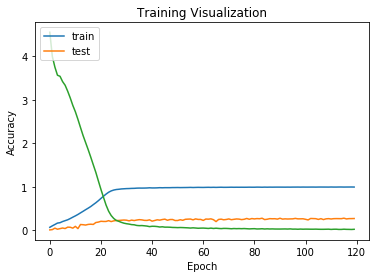

In [45]:
from time import time
tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, 
                                              patience=3)

history = model.fit(
        train_ds.make_one_shot_iterator(),
        steps_per_epoch=len(train_image_paths) // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=val_ds.make_one_shot_iterator(),
        validation_steps=len(val_image_paths) // BATCH_SIZE,
        callbacks=[tensorboard])

# history = model.fit(
#         train_ds.make_one_shot_iterator(),
#         steps_per_epoch=len(train_image_paths) // BATCH_SIZE,
#         epochs=EPOCHS)

visualize_training(history)

In [46]:
model.save_weights('model.h5', overwrite=True)
model.save('savedmodel.h5', overwrite=True)

In [47]:
history = model.fit(
        train_ds.make_one_shot_iterator(),
        steps_per_epoch=len(train_image_paths) // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=val_ds.make_one_shot_iterator(),
        validation_steps=len(val_image_paths) // BATCH_SIZE,
        callbacks=[tensorboard])

Epoch 1/120
777/781 [============================>.] - ETA: 1s - loss: 0.0201 - acc: 0.9937

KeyboardInterrupt: 